# Solve harmonic problem (with damping) using matrix inverse {#ref_solve_modal_problem_advanced}

This example shows how to create a harmonic (over frequencies) fields
container for an analysis with damping. This fields container is then
used to solve the problem Ma+Dv+Ku=F by inverting the matrix


In [1]:
import math

from ansys.dpf import core as dpf
from ansys.dpf.core import operators as ops

Create 2D (x,y) matrix fields for inertia, damping, and stiffness.


In [2]:
freq = [25, 50, 100, 200, 400]
dim = 2  # dimension of matrix

fM0 = dpf.fields_factory.create_matrix_field(1, dim, dim)
fM0.append([0.0, 1.0, 2.0, 3.0], 1)
fK0 = dpf.fields_factory.create_matrix_field(1, dim, dim)
fK0.append([4.0, 8.0, 0.0, 1.0], 1)
fC0 = dpf.fields_factory.create_matrix_field(1, dim, dim)
fC0.append([7.0, 5.0, 9.0, 1.0], 1)

Create a fields container for real and imaginary parts for each
frequency.


In [3]:
reals = {}
ims = {}
for k, f in enumerate(freq):
    omega = 2.0 * math.pi * f
    omega2 = omega**2
    real = fK0 + fM0 * omega2
    imag = fC0 * omega
    reals[f] = real.outputs.field()
    ims[f] = imag.outputs.field()

cplx_fc = dpf.fields_container_factory.over_time_freq_complex_fields_container(
    reals, ims, time_freq_unit="Hz"
)

Use DPF operators to inverse the matrix and then compute the amplitude
and the phase.


In [4]:
inverse = ops.math.matrix_inverse(cplx_fc)
component = ops.logic.component_selector_fc(inverse, 0)
amp = ops.math.amplitude_fc(component)
phase = ops.math.phase_fc(component)

Get the phase and amplitude and then plot it over frequencies.


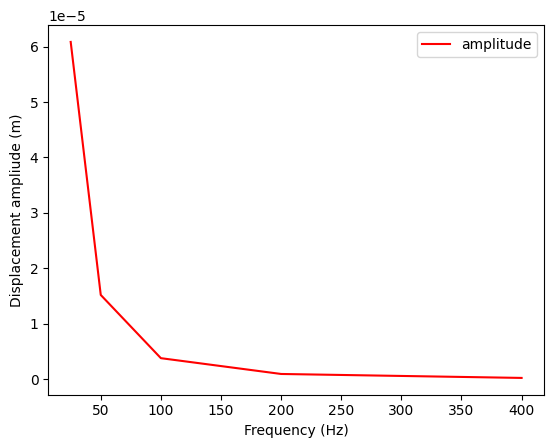

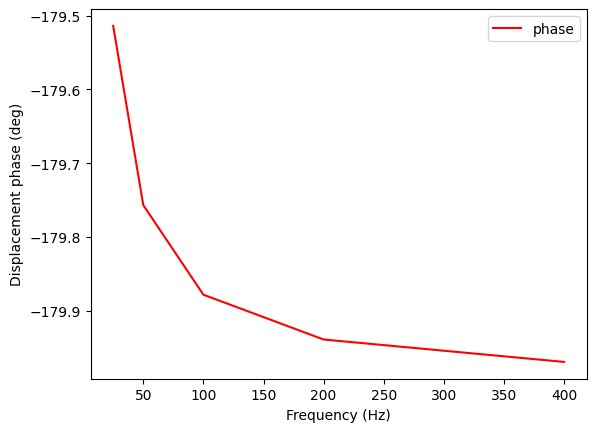

In [5]:
amp_over_frequency = amp.outputs.fields_container()
phase_over_frequency = phase.outputs.fields_container()
time_freq_support = amp_over_frequency.time_freq_support

amp_array = []
phase_array = []
for f in amp_over_frequency:
    amp_array.append(f.data)

for f in phase_over_frequency:
    phase_array.append(f.data * 180.0 / math.pi)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(time_freq_support.time_frequencies.data, amp_array, "r", label="amplitude")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Displacement ampliude (m)")
plt.legend()
plt.show()

plt.figure()
plt.plot(time_freq_support.time_frequencies.data, phase_array, "r", label="phase")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Displacement phase (deg)")
plt.legend()
plt.show()